**MOUNT DRIVE**

In [8]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
print("GPU Available: ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Mounted at /content/drive
GPU Available:  True


*   CLAHE = /content/drive/MyDrive/Dataset224Clahe
*   Tanpa CLAHE = /content/drive/MyDrive/Dataset224




#**CLAHE (MENINGKATKAN KONTRAS DATASET) DAN RESIZE 224x224**

In [9]:
import os
import cv2

input_folder = "/content/drive/MyDrive/Dataset"
output_folder = "/content/drive/MyDrive/Dataset224Clahe"

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

categories = ["Normal", "Mass", "Nodule", "Pneumonia", "Tuberculosis"]

for category in categories:
    category_input_folder = os.path.join(input_folder, category)
    category_output_folder = os.path.join(output_folder, category)
    os.makedirs(category_output_folder, exist_ok=True)

    images = os.listdir(category_input_folder)

    for image_name in images:
        image_path = os.path.join(category_input_folder, image_name)
        output_image_path = os.path.join(category_output_folder, image_name)

        if os.path.isfile(image_path):
            # Baca gambar
            img = cv2.imread(image_path)

            # Normalisasi ukuran menjadi 224x224
            img = cv2.resize(img, (224, 224))

            # Lakukan penghapusan noise atau pemrosesan lainnya
            # Misalnya, menggunakan filter Gaussian untuk menghaluskan gambar
            
            # Gaussian
            # img = cv2.GaussianBlur(img, (5, 5), 0)

            # Ubah image ke grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Setting CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            # Terapkan CLAHE pada gambar
            img_clahe = clahe.apply(img_gray)

            # Simpan gambar yang sudah dinormalisasi
            cv2.imwrite(output_image_path, img_clahe)

KeyboardInterrupt: ignored

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Dataset224Clahe"

categories = ["Normal", "Mass", "Nodule", "Pneumonia", "Tuberculosis"]

for category in categories:
    category_folder = os.path.join(output_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

#**RESIZE 224x224 (TANPA CLAHE)**

In [ ]:
import os
import cv2

input_folder = "/content/drive/MyDrive/Dataset"
output_folder = "/content/drive/MyDrive/Dataset224"

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

categories = ["Normal", "Mass", "Nodule", "Pneumonia", "Tuberculosis"]

for category in categories:
    category_input_folder = os.path.join(input_folder, category)
    category_output_folder = os.path.join(output_folder, category)
    os.makedirs(category_output_folder, exist_ok=True)

    images = os.listdir(category_input_folder)

    for image_name in images:
        image_path = os.path.join(category_input_folder, image_name)
        output_image_path = os.path.join(category_output_folder, image_name)

        if os.path.isfile(image_path):
            # Baca gambar
            img = cv2.imread(image_path)

            # Normalisasi ukuran menjadi 224x224
            img = cv2.resize(img, (224, 224))

            # Simpan gambar yang sudah dinormalisasi
            cv2.imwrite(output_image_path, img)

In [ ]:
import os

output_folder = "/content/drive/MyDrive/Dataset224"

categories = ["Normal", "Mass", "Nodule", "Pneumonia", "Tuberculosis"]

for category in categories:
    category_folder = os.path.join(output_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

# ✈**SPLIT 90 TRAIN**


## **TRAIN 90 CLAHE**

In [ ]:
import os
import shutil
import random

# Tentukan path dataset
dataset_path = "/content/drive/MyDrive/Dataset224Clahe"

# Tentukan path output untuk menyimpan dataset terbagi
output_path = "/content/drive/MyDrive/DatasetSplit90Clahe"

# Buat direktori output jika belum ada
os.makedirs(output_path, exist_ok=True)

# Membaca nama file dari setiap kelas
normal_files = os.listdir(os.path.join(dataset_path, "Normal"))
pneumonia_files = os.listdir(os.path.join(dataset_path, "Pneumonia"))
mass_files = os.listdir(os.path.join(dataset_path, "Mass"))
nodule_files = os.listdir(os.path.join(dataset_path, "Nodule"))
tuberculosis_files = os.listdir(os.path.join(dataset_path, "Tuberculosis"))

# Menggabungkan semua kategori
all_files = {
    "Normal": normal_files,
    "Pneumonia": pneumonia_files,
    "Mass": mass_files,
    "Nodule": nodule_files,
    "Tuberculosis": tuberculosis_files
}

# Mengacak urutan file di setiap kategori
for category in all_files:
    random.shuffle(all_files[category])

# Tentukan rasio pembagian dataset
train_ratio = 0.9
validation_ratio = 0.05
test_ratio = 0.05

# Memisahkan dataset menjadi bagian pelatihan, validasi, dan pengujian
train_data = {}
validation_data = {}
test_data = {}

for category, files in all_files.items():
    total_files = len(files)
    train_split = int(train_ratio * total_files)
    validation_split = int(validation_ratio * total_files)

    train_data[category] = files[:train_split]
    validation_data[category] = files[train_split:train_split+validation_split]
    test_data[category] = files[train_split+validation_split:]

# Fungsi untuk memindahkan file ke direktori output
def move_files(files, source_path, destination_path):
    for file in files:
        source_file = os.path.join(source_path, file)
        destination_file = os.path.join(destination_path, file)
        shutil.copyfile(source_file, destination_file)

# Memindahkan file ke direktori output
for category, files in train_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "train", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in validation_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "validation", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in test_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "test", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

print("Split Data Telah Selesai!")

In [ ]:
import os

train_folder = "/content/drive/MyDrive/DatasetSplit90Clahe/train"
validation_folder = "/content/drive/MyDrive/DatasetSplit90Clahe/validation"
test_folder = "/content/drive/MyDrive/DatasetSplit90Clahe/test"

categories = ["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"]

print("TRAIN")
for category in categories:
    category_folder = os.path.join(train_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("VALIDATION")
for category in categories:
    category_folder = os.path.join(validation_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("TEST")
for category in categories:
    category_folder = os.path.join(test_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

## **TRAIN 90 TANPA CLAHE**

In [ ]:
import os
import shutil
import random

# Tentukan path dataset
dataset_path = "/content/drive/MyDrive/Dataset224"

# Tentukan path output untuk menyimpan dataset terbagi
output_path = "/content/drive/MyDrive/DatasetSplit90"

# Buat direktori output jika belum ada
os.makedirs(output_path, exist_ok=True)

# Membaca nama file dari setiap kelas
normal_files = os.listdir(os.path.join(dataset_path, "Normal"))
pneumonia_files = os.listdir(os.path.join(dataset_path, "Pneumonia"))
mass_files = os.listdir(os.path.join(dataset_path, "Mass"))
nodule_files = os.listdir(os.path.join(dataset_path, "Nodule"))
tuberculosis_files = os.listdir(os.path.join(dataset_path, "Tuberculosis"))

# Menggabungkan semua kategori
all_files = {
    "Normal": normal_files,
    "Pneumonia": pneumonia_files,
    "Mass": mass_files,
    "Nodule": nodule_files,
    "Tuberculosis": tuberculosis_files
}

# Mengacak urutan file di setiap kategori
for category in all_files:
    random.shuffle(all_files[category])

# Tentukan rasio pembagian dataset
train_ratio = 0.9
validation_ratio = 0.05
test_ratio = 0.05

# Memisahkan dataset menjadi bagian pelatihan, validasi, dan pengujian
train_data = {}
validation_data = {}
test_data = {}

for category, files in all_files.items():
    total_files = len(files)
    train_split = int(train_ratio * total_files)
    validation_split = int(validation_ratio * total_files)

    train_data[category] = files[:train_split]
    validation_data[category] = files[train_split:train_split+validation_split]
    test_data[category] = files[train_split+validation_split:]

# Fungsi untuk memindahkan file ke direktori output
def move_files(files, source_path, destination_path):
    for file in files:
        source_file = os.path.join(source_path, file)
        destination_file = os.path.join(destination_path, file)
        shutil.copyfile(source_file, destination_file)

# Memindahkan file ke direktori output
for category, files in train_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "train", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in validation_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "validation", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in test_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "test", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

print("Split Data Telah Selesai!")

In [ ]:
import os

train_folder = "/content/drive/MyDrive/DatasetSplit90/train"
validation_folder = "/content/drive/MyDrive/DatasetSplit90/validation"
test_folder = "/content/drive/MyDrive/DatasetSplit90/test"

categories = ["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"]

print("TRAIN")
for category in categories:
    category_folder = os.path.join(train_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("VALIDATION")
for category in categories:
    category_folder = os.path.join(validation_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("TEST")
for category in categories:
    category_folder = os.path.join(test_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

# ✈**SPLIT 80 TRAIN**

## **TRAIN 80 CLAHE**

In [ ]:
import os
import shutil
import random

# Tentukan path dataset
dataset_path = "/content/drive/MyDrive/Dataset224Clahe"

# Tentukan path output untuk menyimpan dataset terbagi
output_path = "/content/drive/MyDrive/DatasetSplit80Clahe"

# Buat direktori output jika belum ada
os.makedirs(output_path, exist_ok=True)

# Membaca nama file dari setiap kelas
normal_files = os.listdir(os.path.join(dataset_path, "Normal"))
pneumonia_files = os.listdir(os.path.join(dataset_path, "Pneumonia"))
mass_files = os.listdir(os.path.join(dataset_path, "Mass"))
nodule_files = os.listdir(os.path.join(dataset_path, "Nodule"))
tuberculosis_files = os.listdir(os.path.join(dataset_path, "Tuberculosis"))

# Menggabungkan semua kategori
all_files = {
    "Normal": normal_files,
    "Pneumonia": pneumonia_files,
    "Mass": mass_files,
    "Nodule": nodule_files,
    "Tuberculosis": tuberculosis_files
}

# Mengacak urutan file di setiap kategori
for category in all_files:
    random.shuffle(all_files[category])

# Tentukan rasio pembagian dataset
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Memisahkan dataset menjadi bagian pelatihan, validasi, dan pengujian
train_data = {}
validation_data = {}
test_data = {}

for category, files in all_files.items():
    total_files = len(files)
    train_split = int(train_ratio * total_files)
    validation_split = int(validation_ratio * total_files)

    train_data[category] = files[:train_split]
    validation_data[category] = files[train_split:train_split+validation_split]
    test_data[category] = files[train_split+validation_split:]

# Fungsi untuk memindahkan file ke direktori output
def move_files(files, source_path, destination_path):
    for file in files:
        source_file = os.path.join(source_path, file)
        destination_file = os.path.join(destination_path, file)
        shutil.copyfile(source_file, destination_file)

# Memindahkan file ke direktori output
for category, files in train_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "train", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in validation_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "validation", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in test_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "test", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

print("Split Data Telah Selesai!")

In [ ]:
import os

train_folder = "/content/drive/MyDrive/DatasetSplit80Clahe/train"
validation_folder = "/content/drive/MyDrive/DatasetSplit80Clahe/validation"
test_folder = "/content/drive/MyDrive/DatasetSplit80Clahe/test"

categories = ["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"]

print("TRAIN")
for category in categories:
    category_folder = os.path.join(train_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("VALIDATION")
for category in categories:
    category_folder = os.path.join(validation_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("TEST")
for category in categories:
    category_folder = os.path.join(test_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

## **TRAIN 80 TANPA CLAHE**

In [ ]:
import os
import shutil
import random

# Tentukan path dataset
dataset_path = "/content/drive/MyDrive/Dataset224"

# Tentukan path output untuk menyimpan dataset terbagi
output_path = "/content/drive/MyDrive/DatasetSplit80"

# Buat direktori output jika belum ada
os.makedirs(output_path, exist_ok=True)

# Membaca nama file dari setiap kelas
normal_files = os.listdir(os.path.join(dataset_path, "Normal"))
pneumonia_files = os.listdir(os.path.join(dataset_path, "Pneumonia"))
mass_files = os.listdir(os.path.join(dataset_path, "Mass"))
nodule_files = os.listdir(os.path.join(dataset_path, "Nodule"))
tuberculosis_files = os.listdir(os.path.join(dataset_path, "Tuberculosis"))

# Menggabungkan semua kategori
all_files = {
    "Normal": normal_files,
    "Pneumonia": pneumonia_files,
    "Mass": mass_files,
    "Nodule": nodule_files,
    "Tuberculosis": tuberculosis_files
}

# Mengacak urutan file di setiap kategori
for category in all_files:
    random.shuffle(all_files[category])

# Tentukan rasio pembagian dataset
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Memisahkan dataset menjadi bagian pelatihan, validasi, dan pengujian
train_data = {}
validation_data = {}
test_data = {}

for category, files in all_files.items():
    total_files = len(files)
    train_split = int(train_ratio * total_files)
    validation_split = int(validation_ratio * total_files)

    train_data[category] = files[:train_split]
    validation_data[category] = files[train_split:train_split+validation_split]
    test_data[category] = files[train_split+validation_split:]

# Fungsi untuk memindahkan file ke direktori output
def move_files(files, source_path, destination_path):
    for file in files:
        source_file = os.path.join(source_path, file)
        destination_file = os.path.join(destination_path, file)
        shutil.copyfile(source_file, destination_file)

# Memindahkan file ke direktori output
for category, files in train_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "train", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in validation_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "validation", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

for category, files in test_data.items():
    source_path = os.path.join(dataset_path, category)
    destination_path = os.path.join(output_path, "test", category)
    os.makedirs(destination_path, exist_ok=True)
    move_files(files, source_path, destination_path)

print("Split Data Telah Selesai!")

In [ ]:
import os

train_folder = "/content/drive/MyDrive/DatasetSplit80/train"
validation_folder = "/content/drive/MyDrive/DatasetSplit80/validation"
test_folder = "/content/drive/MyDrive/DatasetSplit80/test"

categories = ["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"]

print("TRAIN")
for category in categories:
    category_folder = os.path.join(train_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("VALIDATION")
for category in categories:
    category_folder = os.path.join(validation_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")
print("TEST")
for category in categories:
    category_folder = os.path.join(test_folder, category)
    file_count = len(os.listdir(category_folder))
    print(f"Jumlah file pada folder {category}: {file_count}")

In [10]:
train_dir = '/content/drive/MyDrive/DatasetSplit90Clahe/train'
val_dir = '/content/drive/MyDrive/DatasetSplit90Clahe/validation'
test_dir = '/content/drive/MyDrive/DatasetSplit90Clahe/test'

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


num_classes = len(categories)
image_size = (224, 224)
batch_size = 32


train_datagen = ImageDataGenerator(
    # rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
    )

val_datagen = ImageDataGenerator(
    # rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Test Generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Membuat model MobileNet (ditambah channel RGB, karena gambar sebelumnya grayscale)
base_model = MobileNet(input_shape=image_size + (3,), include_top=False, weights='imagenet')

# Menambahkan lapisan global pooling dan lapisan output
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Menggabungkan model
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan lapisan awal (pretrained) agar tidak terupdate saat melatih model (transfer learning)
for layer in base_model.layers:
    layer.trainable = False



Found 9986 images belonging to 5 classes.
Found 1424 images belonging to 5 classes.
Found 1443 images belonging to 5 classes.
17225924/17225924 [==============================] - 0s 0us/step


In [12]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# Buat objek callback EarlyStopping

epochs = 50
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size
# lr = default


early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stop])

# Menyimpan model
model.save('/content/drive/MyDrive/CAPSTONE X-DETECT/MobileNet_90_Adam_model.h5')

Epoch 1/50
312/312 [==============================] - 1718s 5s/step - loss: 0.7219 - accuracy: 0.6837 - val_loss: 0.6451 - val_accuracy: 0.7116
Epoch 2/50
312/312 [==============================] - 37s 117ms/step - loss: 0.5429 - accuracy: 0.7446 - val_loss: 0.4968 - val_accuracy: 0.7493
Epoch 3/50
312/312 [==============================] - 37s 119ms/step - loss: 0.4783 - accuracy: 0.7667 - val_loss: 0.4484 - val_accuracy: 0.7763
Epoch 4/50
312/312 [==============================] - 37s 120ms/step - loss: 0.4548 - accuracy: 0.7780 - val_loss: 0.4034 - val_accuracy: 0.8004
Epoch 5/50
312/312 [==============================] - 36s 114ms/step - loss: 0.4262 - accuracy: 0.7904 - val_loss: 0.3796 - val_accuracy: 0.8125
Epoch 6/50
312/312 [==============================] - 37s 119ms/step - loss: 0.4162 - accuracy: 0.7928 - val_loss: 0.3666 - val_accuracy: 0.8267
Epoch 7/50
312/312 [==============================] - 37s 119ms/step - loss: 0.4008 - accuracy: 0.8036 - val_loss: 0.4049 - val_acc

46/46 [==============================] - 255s 6s/step
              precision    recall  f1-score   support

        Mass    0.98596   0.97232   0.97909       289
      Nodule    0.96897   0.98944   0.97909       284
      Normal    1.00000   0.99315   0.99656       292
   Pneumonia    1.00000   1.00000   1.00000       287
Tuberculosis    1.00000   1.00000   1.00000       291

    accuracy                        0.99099      1443
   macro avg    0.99099   0.99098   0.99095      1443
weighted avg    0.99108   0.99099   0.99100      1443

[[281   8   0   0   0]
 [  3 281   0   0   0]
 [  1   1 290   0   0]
 [  0   0   0 287   0]
 [  0   0   0   0 291]]
1/1 [==============================] - 0s 406ms/step


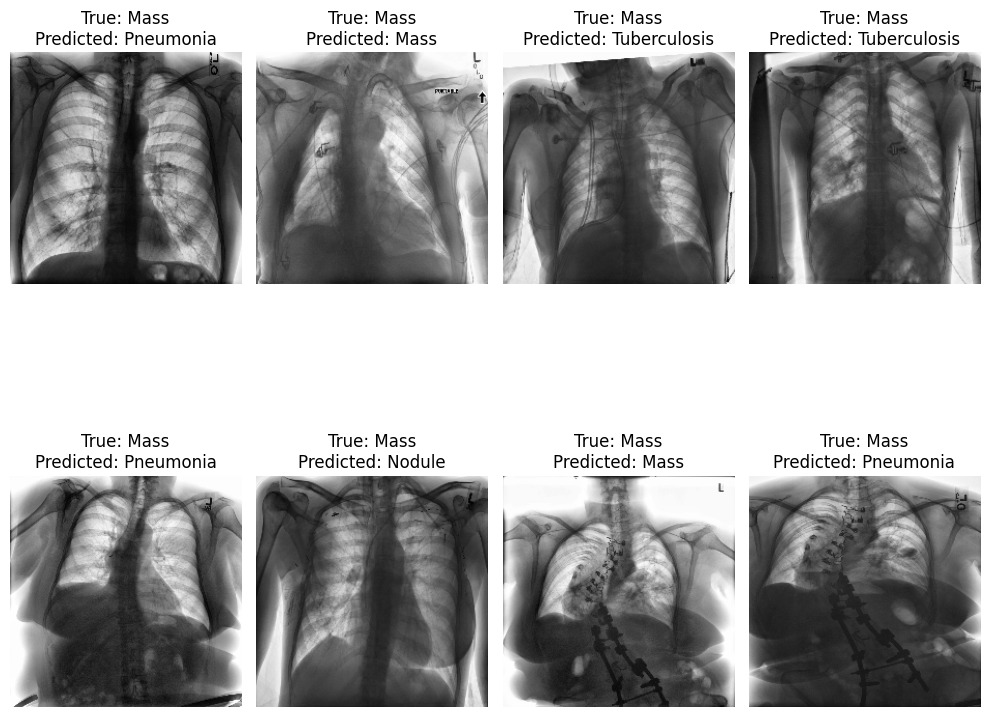

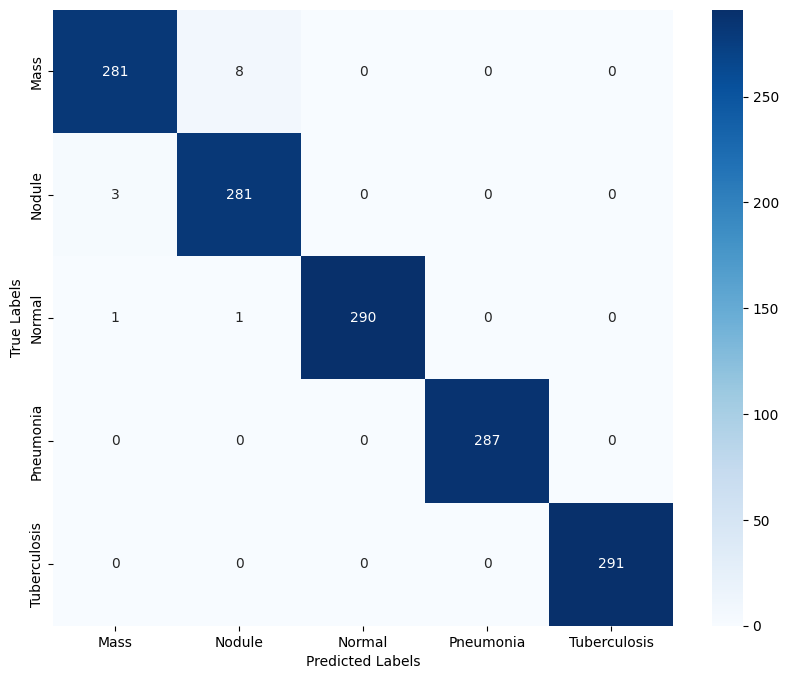

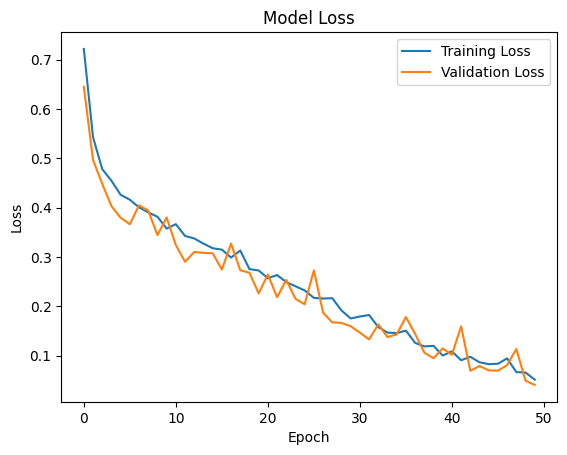

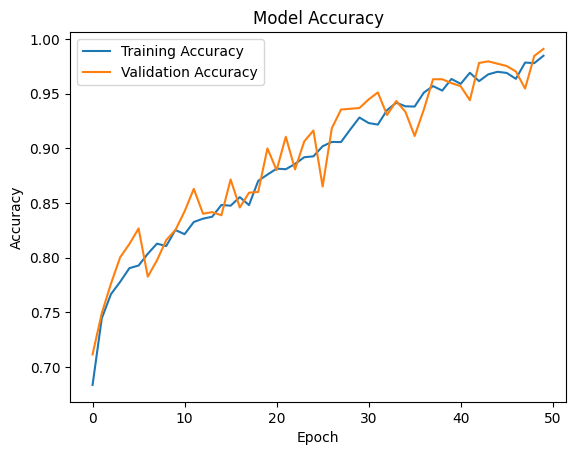

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi data test
y_pred = model.predict(test_generator)

# Prediksi berdasaarkan class/label
y_pred_labels = np.argmax(y_pred, axis=1)
class_names = ["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"]

# get true labels from the generator
y_true = test_generator.classes

# Confusion Matrix
report = classification_report(y_true, y_pred_labels, target_names=class_names, digits=5)
conf_mat = confusion_matrix(y_true, y_pred_labels)

print(report)
print(conf_mat)

# Load batch data
batch_images, batch_labels = next(test_generator)

# Normalisasi kembali gambar ke rentang 0-255
batch_images = (batch_images * 255).astype(np.uint8)

# Predict labels/class dengan model
predicted_labels = model.predict(batch_images)

# Daftar class
class_names = list(train_generator.class_indices.keys())

# Membuat plot
grid_size = (2, 4)
fig, ax = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(10, 10))
for i , axi in enumerate(ax.flat):
    # Plot image
    axi.imshow(batch_images[i])
    axi.set_title(f"True: {class_names[np.argmax(batch_labels[i])]}\nPredicted: {class_names[np.argmax(predicted_labels[i])]}")
    axi.axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', 
            xticklabels=["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"], 
            yticklabels=["Mass", "Nodule", "Normal", "Pneumonia", "Tuberculosis"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Mengambil nilai loss dan akurasi dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Membuat grafik loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Membuat grafik akurasi
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()